For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

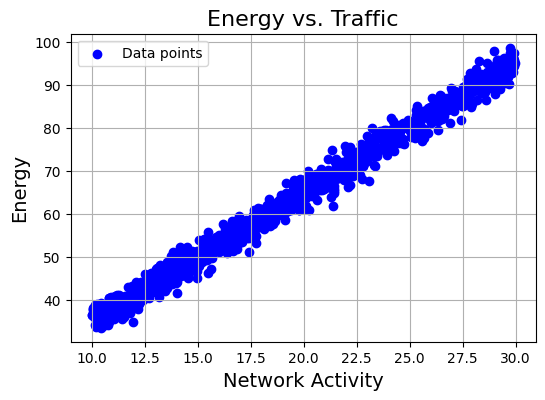

In [11]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

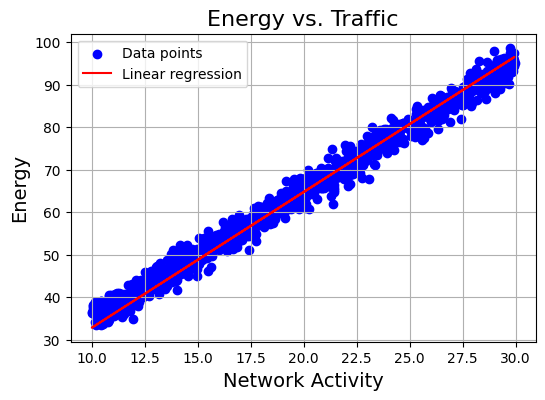

In [14]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

lr.predict(data['Net_Activity'])

pred = lr.predict(data[['Net_Activity']].values)
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], pred, color='red', label='Linear regression')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()





Svar på spørsmål:
A)
vi kan ta (95-35)/(30-10) = 60/20 = 3.0

35 - 3.0×10 = 5.0

3.0 × Network_Activity + 5.0

energy er da integralet og vi får Energy = (3.0/2) × Network_Activity^2 + 5.0*Network_Activity


B)
Da er den forventingsrett og vil i da forklar intivivt og ikke med matte (formel ifra statestikk)
treffe riktig på den faktiske veriden gjennomsnittlig som vi kan se er det normalfordelt rundt 0 i histgogrammet

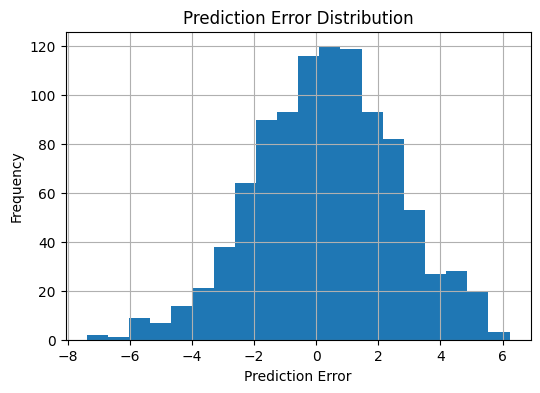

In [15]:
y = pd.read_csv('mission1.csv')['Energy'].to_numpy(dtype=float).ravel()
residuals = y - np.asarray(pred, dtype=float).ravel()
mask = np.isfinite(residuals)
plt.figure(figsize=(6, 4))
plt.hist(residuals[mask], bins=20)
plt.grid(True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency') 
plt.title('Prediction Error Distribution'); plt.show()

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

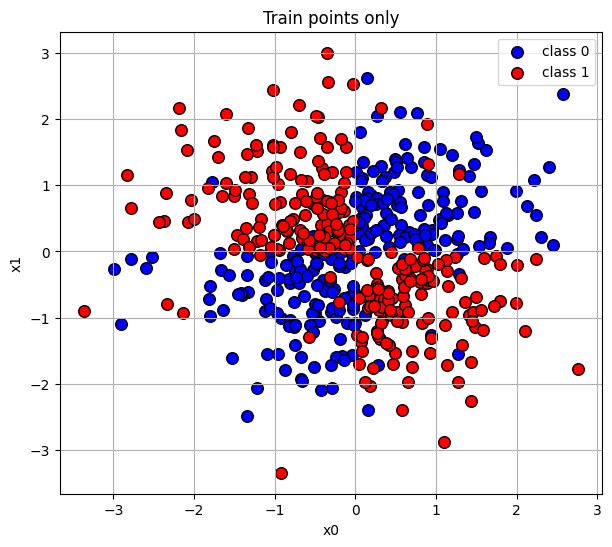

c:\Users\hanev\OneDrive\Desktop\maskinlæring\Assignment1\Ny_Logistic_Regression.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Test accuracy: 0.916
DecisionTree accuracy: 0.876


In [25]:
from Ny_Logistic_Regression import LogisticRegression

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

mask0 = train['y'] == 0
mask1 = train['y'] == 1

plt.figure(figsize=(7,6))
plt.scatter(train.loc[mask0,'x0'], train.loc[mask0,'x1'], c='blue', edgecolor='k', s=70, label='class 0')
plt.scatter(train.loc[mask1,'x0'], train.loc[mask1,'x1'], c='red',  edgecolor='k', s=70, label='class 1')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Train points only')
plt.legend()
plt.grid(True)
plt.show()

model = LogisticRegression()
model.fit(train['x0'].values, train['x1'].values, train['y'].values)

test_pred = model.predict(test['x0'].values, test['x1'].values)

correct = sum(test_pred == test['y'].values)
accuracy = np.mean(test_pred == test['y'].values)
print(f"Test accuracy: {accuracy:.3f}")



from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(train[['x0', 'x1']], train['y'])
tree_acc = tree.score(test[['x0', 'x1']], test['y'])
print(f"DecisionTree accuracy: {tree_acc:.3f}")


Svar på spørmål: 

A) 
jeg prøvde først men vanlig logisitc regesion, funkter svært dårlig, så plottet jeg dataen så at det var delt i kvadrater, tenkte at sin og cos kunne forklare denne godt nok, det funktet heller ikke. kom på tangens (måtte google hvor den var posetiv og negativ lol) stemte overens med dataen som ble plottet
B) 
Induktiv bias er hvordan modellen tror ting henger samme. eksmeplvis at vi sa til moddel at data har en sammenheng med vinkel. hvis vi ikke hadde hatt den antagelsen kunne den ikke lært
C)
VI får bare 0.876 med DecisionTreeClassifier, den kan jo løse den men vanskelig for data som ligger nærme kanten kanskje siden den bare legger inn firkanter og klassfiser dem? 
D) 
se koden under: 

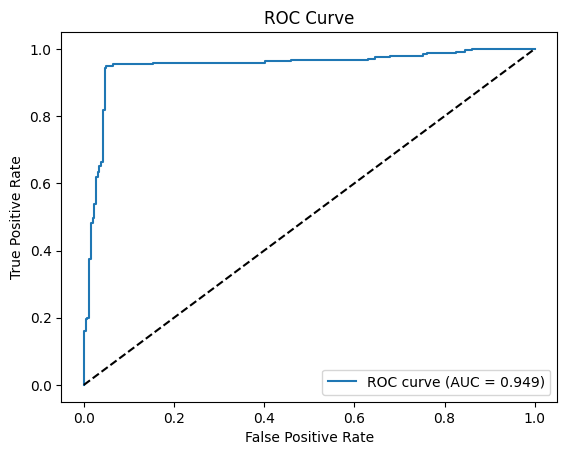

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = model.predict_proba(test['x0'].values, test['x1'].values)
fpr, tpr, _ = roc_curve(test['y'], probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

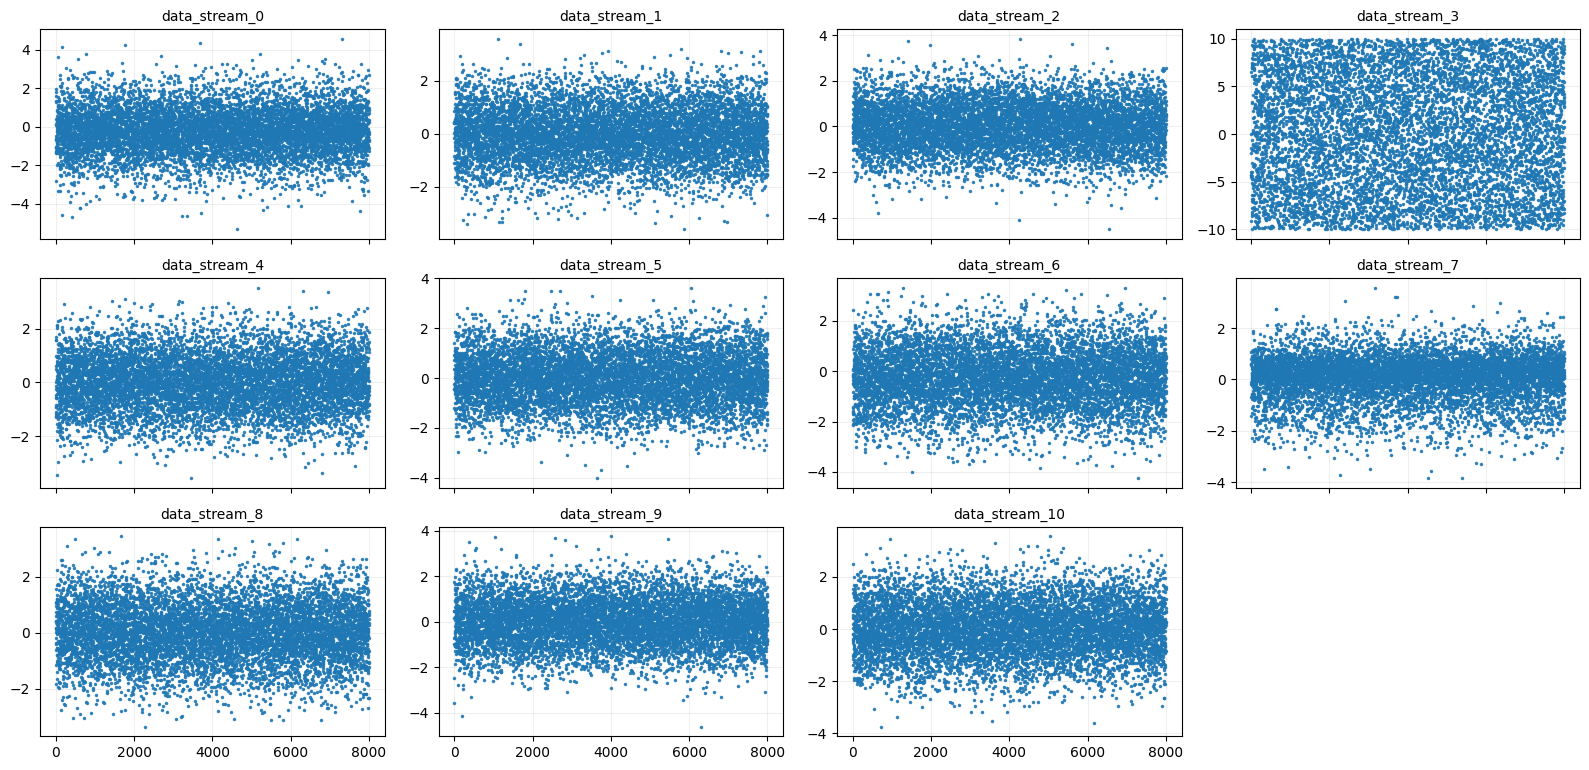

DecisionTree  Train Acc: 1.0000
DecisionTree  Test  Acc: 0.7285


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data
train = pd.read_csv('mission3_train.csv')
test  = pd.read_csv('mission3_test.csv')

train_target = train['target']
train = train.drop(columns=['target'])
test_target = test['target']
test = test.drop(columns=['target'])

# Plot data_stream
feat_cols = sorted([c for c in train.columns if c.startswith('data_stream_')],
                   key=lambda c: int(c.split('_')[-1]))

n = len(feat_cols); ncols = 4; nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 2.6*nrows), sharex=True)
axes = axes.ravel()
for i, col in enumerate(feat_cols):
    axes[i].plot(train[col].values, '.', markersize=3, alpha=0.85)
    axes[i].set_title(col, fontsize=10)
    axes[i].grid(True, alpha=0.2)
for j in range(n, nrows*ncols):
    axes[j].axis('off')
plt.tight_layout(); plt.show()

def fix_column_new(data, column):
    data[column] = (data[column] * 1000).astype(int) % 2
    return data

train_new = fix_column_new(train.copy(), 'data_stream_3')
test_new = fix_column_new(test.copy(), 'data_stream_3')

dt = DecisionTreeClassifier()
dt.fit(train_new, train_target)

# Accuracy
train_pred = dt.predict(train_new)
test_pred  = dt.predict(test_new)
train_acc = np.mean(train_pred == train_target)
test_acc  = np.mean(test_pred  == test_target)
print(f"DecisionTree  Train Acc: {train_acc:.4f}")
print(f"DecisionTree  Test  Acc: {test_acc:.4f}")






DecisionTree Train Acc: 0.8234
DecisionTree Test  Acc: 0.8090


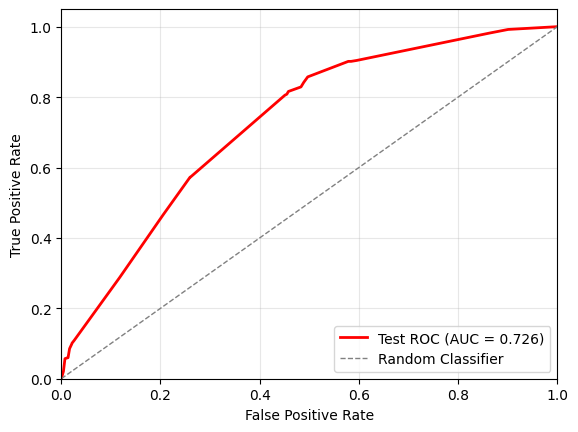

In [19]:
dtNy = DecisionTreeClassifier(
    max_depth=5,
)


dtNy.fit(train_new, train_target)

train_pred = dtNy.predict(train_new)
test_pred = dtNy.predict(test_new)

train_acc = np.mean(train_pred == train_target)
test_acc = np.mean(test_pred == test_target)

print(f"DecisionTree Train Acc: {train_acc:.4f}")
print(f"DecisionTree Test  Acc: {test_acc:.4f}")

train_proba = dtNy.predict_proba(train_new)[:, 1]  
test_proba = dtNy.predict_proba(test_new)[:, 1]   

fpr_test, tpr_test, _ = roc_curve(test_target, test_proba)
auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC (AUC = {auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()




A)
jeg skulle egentlig bare sjekke/tweake litt maunelt for å se hvordan det fungerte, men så jeg det økte når jeg gikk ifra depth 1 og oppover så bare økte til jeg kom over. hvis det ikke hadde fungert kunne du laget en for løkke og kjørte mange og beholt max. lett oppsett men ikke skalerbart


B) 
jeg kan bruke roc fordi jeg skille mellom 0 og 1. og roc gir hvor godt enn skiller mellom. vi kan se at vi er 22 ish prosent bedre enn randome gjetting. 


Test Accuracy: 0.8145


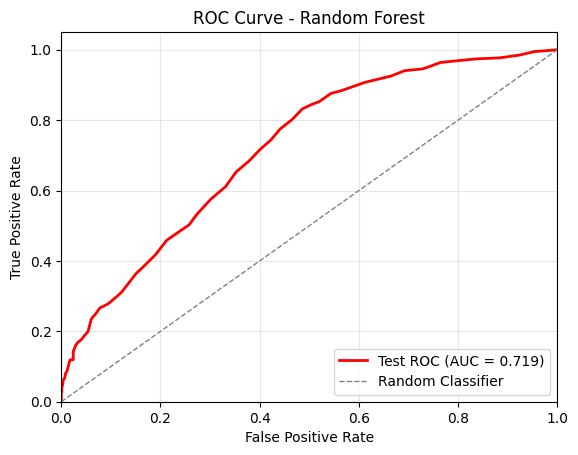

Test AUC: 0.7195


In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(train_new, train_target)

train_predictions = rf_model.predict(train_new)
test_predictions = rf_model.predict(test_new)

test_accuracy = np.mean(test_predictions == test_target)

print(f"Test Accuracy: {test_accuracy:.4f}")

test_predictions = rf_model.predict_proba(test_new)[:, 1]

fpr_test, tpr_test, _ = roc_curve(test_target, test_predictions)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC (AUC = {auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Test AUC: {auc_test:.4f}")

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [24]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

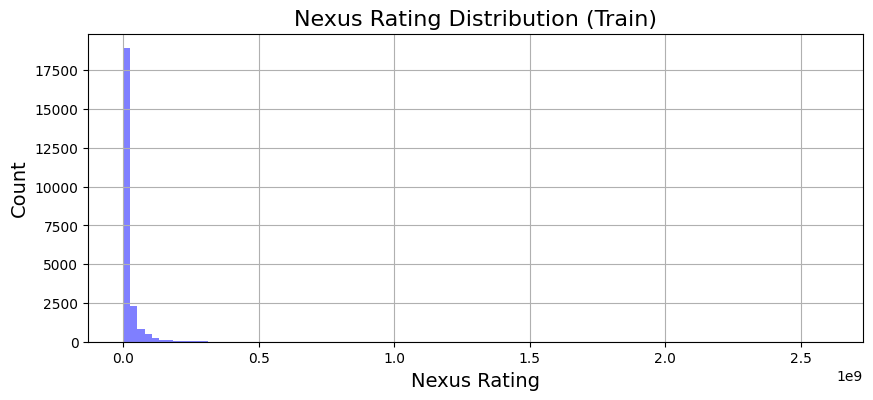

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [25]:
test.describe()



,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9.937000e+03
mean,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,2.327010e+07
std,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,4.345831e+07
min,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+06
25%,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.599000e+06
50%,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.100000e+07
75%,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.074351e+07
max,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9.285855e+08


In [26]:
train.describe()


,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


Vi kan se at data er flyttet et shift


In [1]:
import pandas as pd

train = pd.read_csv("final_mission_train.csv")
test  = pd.read_csv("final_mission_test.csv")

fixed_test = pd.DataFrame()

fixed_test["ownership_type"]            = test["ownership_type"]
fixed_test["nexus_rating"]              = test["grid_connections"]
fixed_test["energy_footprint"]          = test["nexus_rating"]
fixed_test["core_reactor_size"]         = test["energy_footprint"]
fixed_test["harvesting_space"]          = test["core_reactor_size"]
fixed_test["vertical_alignment"]        = test["harvesting_space"]
fixed_test["power_chambers"]            = test["vertical_alignment"]
fixed_test["energy_flow_design"]        = test["power_chambers"]
fixed_test["upper_collector_height"]    = test["energy_flow_design"]
fixed_test["shared_conversion_units"]   = test["upper_collector_height"]
fixed_test["isolated_conversion_units"] = test["shared_conversion_units"]
fixed_test["internal_collectors"]       = test["isolated_conversion_units"]
fixed_test["external_collectors"]       = test["internal_collectors"]
fixed_test["ambient_harvesters"]        = test["external_collectors"]
fixed_test["shielded_harvesters"]       = test["ambient_harvesters"]
fixed_test["efficiency_grade"]          = test["shielded_harvesters"]
fixed_test["grid_connections"]          = test["efficiency_grade"]

fixed_test = fixed_test[train.columns]
fixed_test.describe()


,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9.937000e+03,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000
mean,1.805838,2.327010e+07,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003
std,1.087742,4.345831e+07,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727
min,0.000000,2.400000e+06,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.599000e+06,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.100000e+07,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,2.074351e+07,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,9.285855e+08,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [10]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
